step-1 : Import necessary libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score


step-2 :  Load a sample sentiment dataset (movie reviews)

In [2]:
# We'll use the built-in dataset from sklearn
from sklearn.datasets import load_files

# Download the dataset from NLTK or use your own dataset if needed
# Here, we simulate a small dataset for demonstration
import nltk
nltk.download('movie_reviews')
from nltk.corpus import movie_reviews
import random

# Create the dataset
documents = [(movie_reviews.raw(fileid), category)
             for category in movie_reviews.categories()
             for fileid in movie_reviews.fileids(category)]

random.shuffle(documents)
texts, labels = zip(*documents)

df = pd.DataFrame({'review': texts, 'sentiment': labels})
df['sentiment'] = df['sentiment'].map({'pos': 1, 'neg': 0})  # Convert to binary
df.head()


[nltk_data] Downloading package movie_reviews to /root/nltk_data...
[nltk_data]   Unzipping corpora/movie_reviews.zip.


,review,sentiment
0,"everyone knows that old rule , 'never work wit...",0
1,"no matter what you suspect , this isn't your u...",1
2,so many students strive to get into schools su...,1
3,the release of dolores claiborne into wide rel...,1
4,"on june 30 , 1960 , a self-taught , idealistic...",1


step-3 : Data preprocessing

review       0
sentiment    0
dtype: int64


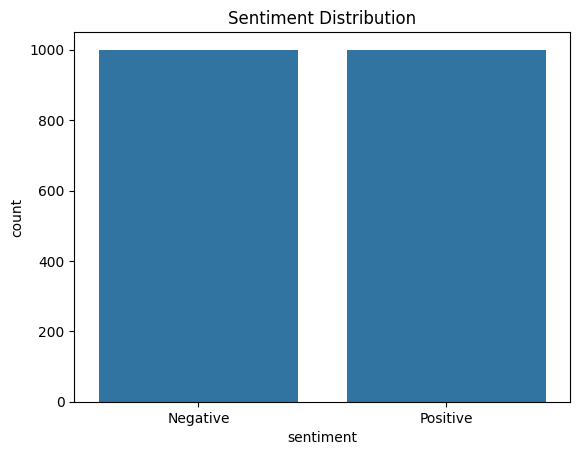

In [3]:
# Check for missing values
print(df.isnull().sum())

# Display class distribution
sns.countplot(x='sentiment', data=df)
plt.title("Sentiment Distribution")
plt.xticks([0, 1], ['Negative', 'Positive'])
plt.show()


step-4 : Feature extraction using TF-IDF Vectorizer

In [4]:
tfidf = TfidfVectorizer(max_features=5000, stop_words='english')

X = tfidf.fit_transform(df['review']).toarray()
y = df['sentiment']

step-5 :  Train-Test split

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

step-6 : Model training (Logistic Regression)


In [6]:
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

step-7 : Model evaluation

Accuracy: 0.82

Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.80      0.82       205
           1       0.80      0.84      0.82       195

    accuracy                           0.82       400
   macro avg       0.82      0.82      0.82       400
weighted avg       0.82      0.82      0.82       400



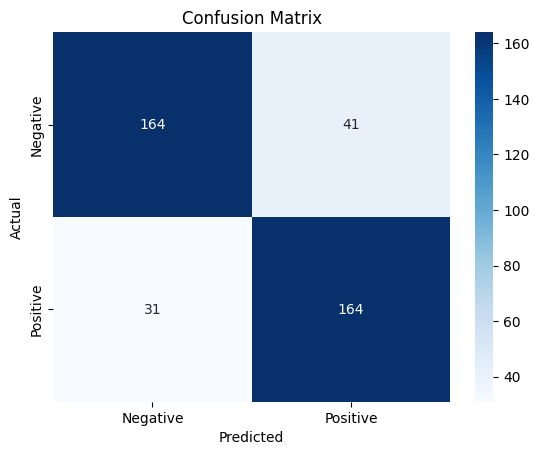

In [7]:
y_pred = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Negative', 'Positive'],
            yticklabels=['Negative', 'Positive'])
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


step-8 : Predict sentiment on new reviews

In [9]:
sample_reviews = [
    "I absolutely loved the movie, it was fantastic!",
    "It was a waste of time. The story was boring and predictable."
]

sample_features = tfidf.transform(sample_reviews).toarray()
sample_preds = model.predict(sample_features)

for review, pred in zip(sample_reviews, sample_preds):
    sentiment = "Positive" if pred == 1 else "Negative"
    print(f"Review: {review}\nPredicted Sentiment: {sentiment}\n")

Review: I absolutely loved the movie, it was fantastic!
Predicted Sentiment: Positive

Review: It was a waste of time. The story was boring and predictable.
Predicted Sentiment: Negative

